In [468]:
# import necessary libraries
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, Input

# Load the Dataset:

In [470]:
# read the data set
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') #ISO-8859-1 (also known as latin1)

In [471]:
df

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Text Preprocessing:

In [473]:
# Define stop words
stop_words = set(stopwords.words('english'))

In [474]:
# user defined function to preprocess text. Convert to lower case, Word tokenize and and remove stopwords and join
def preprocess_text(text):
    # Tokenize and remove stop words
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [475]:
# Apply preprocessing
df['message'] = df['message'].apply(preprocess_text)

In [476]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['message'])
sequences = tokenizer.texts_to_sequences(df['message'])

In [477]:
# Pad sequences
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

In [478]:
# Encode labels
y = df['class'].map({'ham': 0, 'spam': 1}).values

# Split the Dataset

In [480]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Your RNN Model

In [482]:
# Define the RNN model with Input layer
model = Sequential()
model.add(Input(shape=(max_sequence_length,))) # Define the input shape
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [483]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [484]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8860 - loss: 0.3130 - val_accuracy: 0.9742 - val_loss: 0.0905
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9862 - loss: 0.0615 - val_accuracy: 0.9798 - val_loss: 0.0690
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9941 - loss: 0.0283 - val_accuracy: 0.9798 - val_loss: 0.0790
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9960 - loss: 0.0115 - val_accuracy: 0.9787 - val_loss: 0.0887
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.9787 - val_loss: 0.0956


# Monitor the Training Process

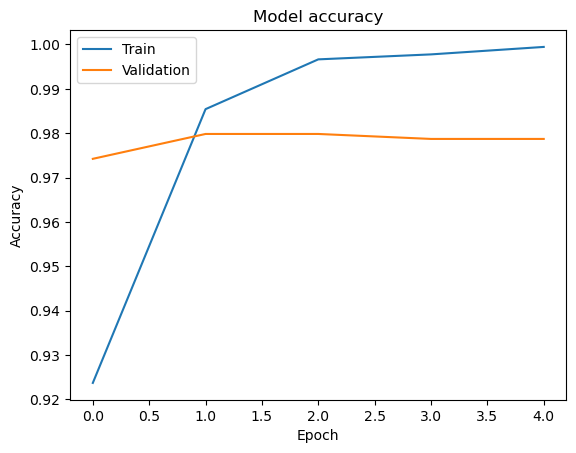

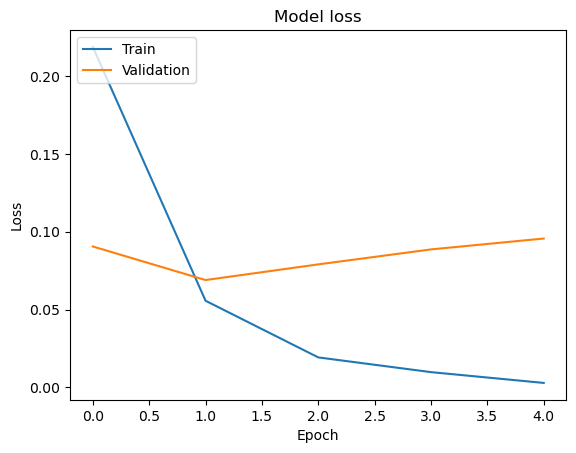

In [486]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the Trained Model

In [488]:
from sklearn.metrics import classification_report

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# Analyze the Performance

In [490]:
# By looking into classification report and training plot model is working fine. Because precision, recall and f1-score is above 90%
# training and validation accuracy is 99% and 98% almost equal as well as loss is negligible

# Discuss Strengths and Weaknesses of RNNs

## Strengths:

##### RNNs are good for sequential data and can capture temporal dependencies in text.
##### They can learn context and patterns from previous tokens in sequences.

## Weaknesses:

##### RNNs can suffer from vanishing/exploding gradient problems.
##### They can be computationally intensive for long sequences.